<a href="https://colab.research.google.com/github/Jacobbaum19/Data-Science-Projects/blob/main/Jacob_Baum_Nobel_Prize_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [63]:
%pip install --upgrade plotly

### Import Statements

In [64]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [65]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [66]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [67]:
# Look at the first 5 rows
df_data.head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


<img src="https://th.bing.com/th/id/OIP.Cvwudr41YsSBoBIgHXrL3gAAAA?rs=1&pid=ImgDetMain"/>

(Image source: https://www.atomicarchive.com/resources/biographies/einstein.html)

In [68]:
# Finding Eistien...

df_data[df_data["full_name"] == "Albert Einstein"]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
106,1921,Physics,The Nobel Prize in Physics 1921,"""for his services to Theoretical Physics, and ...",1/1,Individual,Albert Einstein,1879-03-14,Ulm,Germany,Germany,Male,Max-Planck Institut,Berlin,Germany,DEU


In [69]:
# Shape of the data
df_data.shape

(962, 16)

- 962 rows and 16 columns

In [70]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [71]:
# Finding the oldest Noble Piece Price
df_data.sort_values(by="year", ascending=True)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


- 1901 was the first Nobel Piece Award awarded to "Jacobus Henricus van 't Hoff	"
- 2020 was the last Noble Piece price in the dataset was awarded to "Roger Penrose"

**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [72]:
duplicated_values_count = df_data.duplicated().values.sum()

In [73]:
duplicated_values_count

0

0 duplicated values?... More on that later

### Check for NaN Values

In [74]:
# Check for NA Values

In [75]:
df_data.isna().values.any()

True

In [76]:
# Check what columns have NA values
nan_cols = list(df_data.columns[df_data.isna().any()])
print(nan_cols)

['motivation', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO']


In [77]:
# Check the number of NA values in each column
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

- Orgaization name and city have the most NA values at 255.

In [78]:
# Check a sample of NA column values where the birth date values are NaN
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']

df_data.loc[df_data["birth_date"].isna()][col_subset].head(10)

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


Interesting the full name is Organization Name?

In [79]:
# Checking the organization_name values
df_data.loc[df_data["organization_name"].isna()][col_subset].head(10)

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
10,1902,Peace,Individual,1833-02-19,Élie Ducommun,NaN
14,1903,Literature,Individual,1832-12-08,Bjørnstjerne Martinus Bjørnson,NaN
16,1903,Peace,Individual,1828-03-18,William Randal Cremer,NaN
18,1903,Physics,Individual,1867-11-07,"Marie Curie, née Sklodowska",NaN
21,1904,Literature,Individual,1830-09-08,Frédéric Mistral,NaN


- A lot of price winners in Peace and Literature were not associated with an organization or a university.

### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [80]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

#### Add a Column with the Prize Share as a Percentage

In [81]:
# First convert the price share to a numerator and a denominator
seperated_values = df_data["prize_share"].str.split("/", expand=True)
numerator = pd.to_numeric(seperated_values[0])
denominator = pd.to_numeric(seperated_values[1])

In [82]:
# Then make a new column called prize share which gives the percentage of how much
# the awardee recieved.

df_data["price_share_percentage"] = (numerator / denominator) * 100

In [83]:
# Checking it out...
df_data.head(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU,100.00
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU,100.00
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU,100.00
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND,100.00
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00


In [84]:
# Checking the object type of the columns...
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    962 non-null    int64         
 1   category                962 non-null    object        
 2   prize                   962 non-null    object        
 3   motivation              874 non-null    object        
 4   prize_share             962 non-null    object        
 5   laureate_type           962 non-null    object        
 6   full_name               962 non-null    object        
 7   birth_date              934 non-null    datetime64[ns]
 8   birth_city              931 non-null    object        
 9   birth_country           934 non-null    object        
 10  birth_country_current   934 non-null    object        
 11  sex                     934 non-null    object        
 12  organization_name       707 non-null    object    

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [85]:
# Count of all the awardees by sex
biology_count = df_data.sex.value_counts()

fig_1 = px.pie(labels=biology_count.index,
               values=biology_count.values,
               title="Men vs Women Awardee Percentage",
               names=biology_count.index,
               hole=0.4)

fig_1.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig_1.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [86]:
# First three female winners
df_data[df_data["sex"] == "Female"].sort_values(by="year", ascending=True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


First three female winners were:
- Marie Curie (1903) for Physics, discovery of Radium. (https://www.britannica.com/topic/Marie-Curie-and-Irene-Curie-on-radium-1983710)
- Barnoness Bertha Sophie Felicita (1905) for Peace
- Selma Ottillia (1909) for Literature

They were not part of any organization or university and they were all born in Europe.

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [87]:
duplicated_names_values = df_data.duplicated(subset="full_name", keep=False) # Keeps all duplicated names
muliple_winners = df_data[duplicated_names_values]

In [88]:
print(f" There were {muliple_winners['full_name'].nunique()} winners that won muliple times.")

 There were 6 winners that won muliple times.


In [89]:
# Names of the winners
col_subset_2 = ["year", "category", "full_name", "laureate_type"]
muliple_winners[col_subset_2]

,year,category,full_name,laureate_type
18,1903,Physics,"Marie Curie, née Sklodowska",Individual
62,1911,Chemistry,"Marie Curie, née Sklodowska",Individual
89,1917,Peace,Comité international de la Croix Rouge (Intern...,Organization
215,1944,Peace,Comité international de la Croix Rouge (Intern...,Organization
278,1954,Chemistry,Linus Carl Pauling,Individual
283,1954,Peace,Office of the United Nations High Commissioner...,Organization
297,1956,Physics,John Bardeen,Individual
306,1958,Chemistry,Frederick Sanger,Individual
340,1962,Peace,Linus Carl Pauling,Individual
348,1963,Peace,Comité international de la Croix Rouge (Intern...,Organization


Those 6 winners were:

- Marie Curie (first women to win a Nobel prize)
- The Red Cross (only one to win 3 awards)
- Linus Carl Pauling (won once for his work in Chemistry and then for his activism against nuclear weapons in 1962) (https://www.britannica.com/biography/Linus-Pauling)
- Office of the United Nations High Commissioner for Refugees
- John Bardeen (Only one to win twice in Physics)
- Frederick Sanger (proved proteins have a chemical structure) (https://www.britannica.com/biography/Frederick-Sanger)

# <b>Marie Curie!</b>

<img src="https://th.bing.com/th/id/R.347cd01fc82c921ee2ee74fc6090f0d1?rik=vLohZpid%2btMTHg&riu=http%3a%2f%2fhome.bt.com%2fimages%2fmarie-curie-named-most-significant-woman-in-history-in-poll-136428822696402601-180809001025.jpg&ehk=FQTB%2fbAbe0Qxl0M0uFvjEGMFNTqWt%2fKE6JCs1n0t%2fqE%3d&risl=&pid=ImgRaw&r=0/">

Image source: "http://home.bt.com/news/showbiz-news/marie-curie-named-most-significant-woman-in-history-in-poll-11364288227266"

# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [90]:
number_of_categories = df_data["category"].nunique()
number_of_categories

6

Six catagories of awards:
- Chemistry
- Literature
- Medicene
- Physics
- Peace
- Economics

In [91]:
prizes_per_category = df_data["category"].value_counts()

fig_2 = px.bar(x=prizes_per_category.index,
               y=prizes_per_category.values,
               color=prizes_per_category.index,
               color_continuous_scale="aggrnyl",
               title="Prizes per Category",
               labels={"x": "Category", "y": "Count"}) # Axis labels
fig_2.show()

- Most awards: Medicene has 222 prize winners.
- Least awards: Economics at 86 prize winners. (Economics was not initally established as a Nobel Piece Prize category until the 1960s.) (https://www.britannica.com/topic/Winners-of-the-Nobel-Prize-for-Economics-1856936)



**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [92]:
df_data[df_data["category"] == "Economics"].sort_values(by="year", ascending=True).head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00


- First winner in economics was Jan Tinbergen (Male) in 1969.

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [93]:
count_men_women = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})

count_men_women.sort_values('prize', ascending=False, inplace=True)
count_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [94]:
# Define a color map
color_map = {'Men': 'green', 'Women': 'purple'}

# Making the graph
fig_3 = px.bar(
               x=count_men_women["category"],
               y=count_men_women["prize"],
               color=count_men_women["sex"],
               color_discrete_map=color_map)

# Display the graph
fig_3.show()

- Only 4 women ever won Nobel Prices while 16 women won in Literature.

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [95]:
count_of_prizes = df_data.groupby(by="year").count()["prize"]

count_of_prizes

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [96]:
five_year_moving_average = count_of_prizes.rolling(window=60, min_periods=1).mean() # 5 years = 60 cycles.

five_year_moving_average

year
1901    6.00
1902    6.50
1903    6.67
1904    6.50
1905    6.20
        ... 
2016   10.18
2017   10.28
2018   10.35
2019   10.47
2020   10.57
Name: prize, Length: 117, dtype: float64

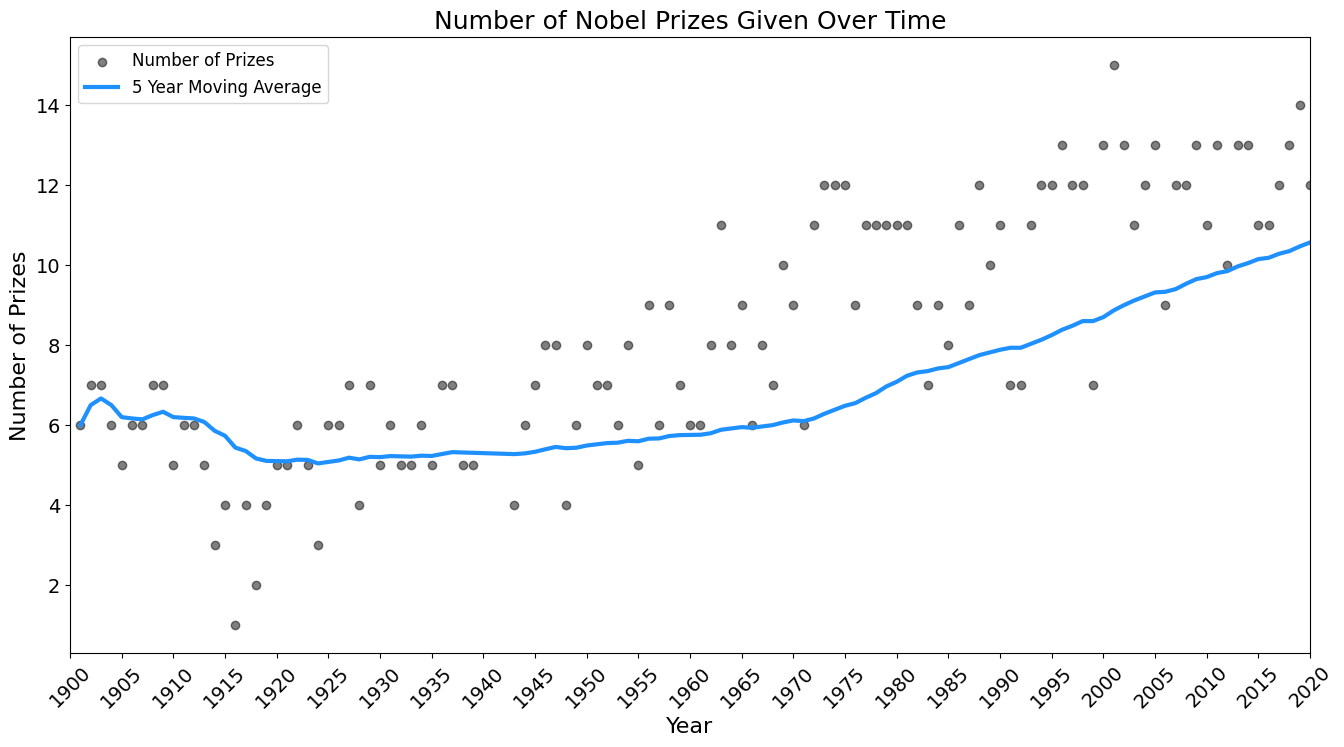

In [97]:
# Plot of the number of prizes over time and the 5 year moving average

fig, ax = plt.subplots(figsize=(16, 8))

scatter = ax.scatter(x=count_of_prizes.index,
                     y=count_of_prizes.values,
                     color="black",
                     alpha=0.5,
                     label="Number of Prizes")

# 5 year moving average
line, = ax.plot(count_of_prizes.index,
                five_year_moving_average.values,
                color="#1E90FF", # Dodger blue hex code
                linewidth=3,
                label="5 Year Moving Average")

ax.set_title("Number of Nobel Prizes Given Over Time", fontsize=18)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Number of Prizes", fontsize=16)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

# Adding the tick marks
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

# Add legend
ax.legend(handles=[scatter, line],
          loc='upper left',
          fontsize=12)

- WWI affected the number of Nobel prizes given out more compared to WWII which appeared to stay steady and increase after the war.


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [98]:
# Calculating the median prize share for each year instead...
# Does not make sense to use mean because these values do not represent the population.

median_price_share = df_data.groupby('year')['price_share_percentage'].median()
median_price_share

year
1901   100.00
1902    50.00
1903   100.00
1904   100.00
1905   100.00
        ...  
2016    50.00
2017    33.33
2018    50.00
2019    33.33
2020    50.00
Name: price_share_percentage, Length: 117, dtype: float64

In [99]:
five_year_moving_median_prize_share = median_price_share.rolling(window=5, min_periods=1).median()

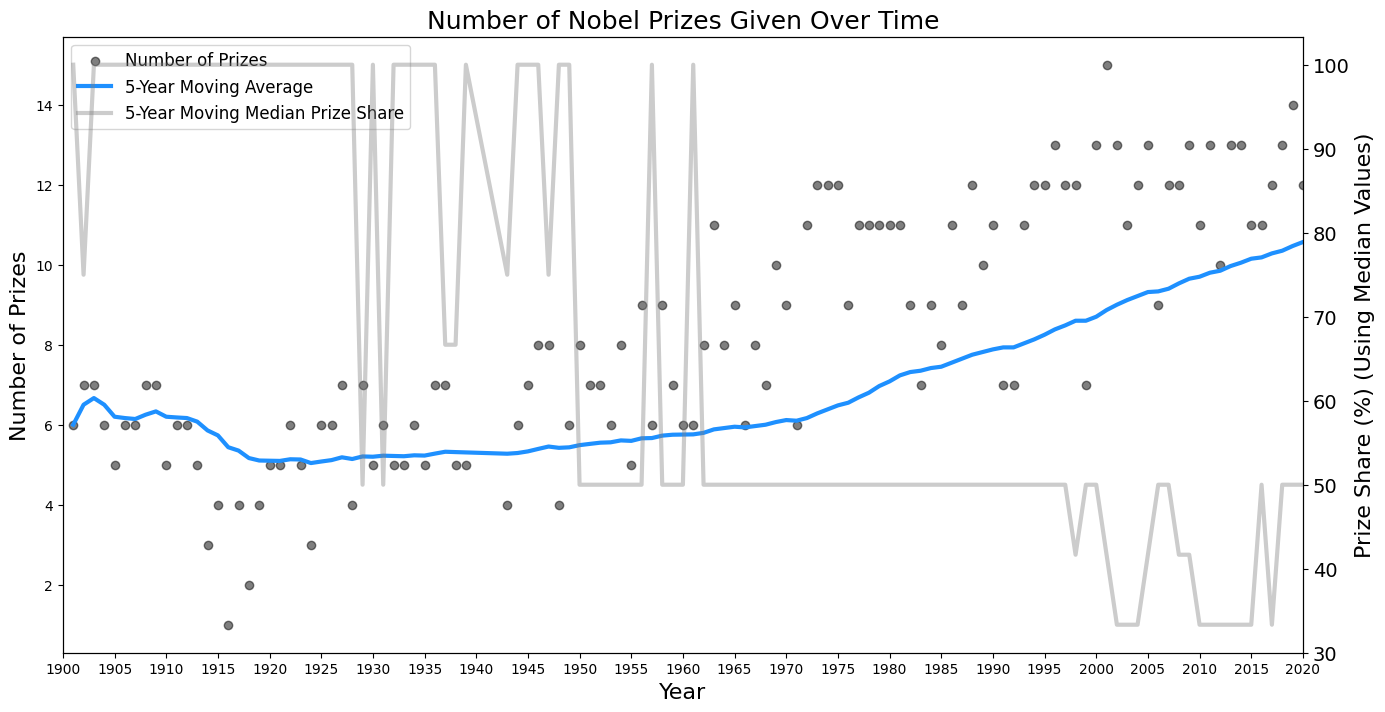

In [100]:
# Plot of the number of prizes over time and the 5 year moving average
# NOT inverting the y-axis because it makes the graph quite confusing to read.

fig, ax = plt.subplots(figsize=(16, 8))

ax = plt.gca()
ax2 = ax.twinx() # Create secondary axis
ax.set_xlim(1900, 2020)

scatter = ax.scatter(x=count_of_prizes.index,
                     y=count_of_prizes.values,
                     color="black",
                     alpha=0.5)

# 5 year moving average
line, = ax.plot(count_of_prizes.index, # The comma after 'line' makes the legend work...
                five_year_moving_average.values,
                color="#1E90FF",
                linewidth=3)

ax.set_title("Number of Nobel Prizes Given Over Time", fontsize=18)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Number of Prizes", fontsize=16)
ax2.set_ylabel("Prize Share (%) (Using Median Values)", fontsize=16)

# Plotting the 5 year moving median of prize share
line2, = ax2.plot(median_price_share.index,
                  five_year_moving_median_prize_share,
                  color="grey",
                  linewidth=3,
                  alpha=0.4)

# Adding the tick marks
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

# Adding the legend
ax.legend(handles=[scatter, line, line2],
          labels=["Number of Prizes", "5-Year Moving Average", "5-Year Moving Median Prize Share"],
          loc='upper left',
          fontsize=12)

### Key Findings:

- WWI (1910-1914) saw a decrease in Nobel Prizes given out.
- WW2 (1940-1945) remained steady with the prizes.
- Ever since then the number of prizes has steadily increased with more prizes given out than ever before in recent times.
- However, the prize share percentage has not rose above 50% (the price was given out to 2 people for one body of work) since the 1962.

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [101]:
top_countries = df_data.groupby(by="birth_country_current", as_index=False).agg({"prize": pd.Series.count})

# Sorting the values in descending order
top_countries = top_countries.sort_values(by="prize", ascending=False)
top_20_countries = top_countries.head(20)

# Checking...
top_20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


I assume it's best to use birth_country current as that is where there research likely took place.
- Some potential problems when using birth_country or organization_country:
  - May not correctly reflect where the reserach that lead to the Nobel prize took place.
  - For example, Marie Curie did most of her reserach in Paris but she was born in Warsaw, Poland

Therefore, birth_country_current is likely the least problamtic.

In [102]:
# Chart is reversed from the example but it conveys the same message...

country_bar_chart = px.bar(x=top_20_countries["prize"],
                           y=top_20_countries["birth_country_current"],
                           orientation="h",
                           color=top_20_countries["prize"],
                           title="Number of Prizes by Country")

# Update the chart and remove the legend

country_bar_chart.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)

country_bar_chart.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [103]:
df_countries = df_data.groupby(by=["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})
df_countries

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [104]:
# Generating the world map of Nobel Prizes.

world_map = px.choropleth(df_countries,
                          locations="ISO",
                          color="prize",
                          hover_name="birth_country_current")

world_map.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [105]:
# First step: group the birth country current and category and aggregate number of prizes

count_men_women_country = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})

count_men_women_country.sort_values(by='prize', ascending=False, inplace=True)
count_men_women_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [106]:
# Merge the count_men_women_country with the top_20 countries by birth_country_current to
# get the total number of prizes.
# Works by grouping the male and female winners in each category to the create prize_y column (total number of prizes)

merged_df = pd.merge(count_men_women_country, top_20_countries, on="birth_country_current")
merged_df.head(10)

,birth_country_current,category,prize_x,prize_y
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
5,United States of America,Literature,10,281
6,United Kingdom,Medicine,28,105
7,United Kingdom,Chemistry,27,105
8,United Kingdom,Physics,24,105
9,United Kingdom,Peace,11,105


In [107]:
# Renaming the prize_x and prize_y columns

merged_df.columns = ["birth_country_current", "category", "number_of_prizes", "total_prizes"]
merged_df

,birth_country_current,category,number_of_prizes,total_prizes
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
104,India,Literature,2,9
105,India,Medicine,2,9
106,India,Chemistry,1,9
107,India,Peace,1,9


In [108]:
# Sorting the prizes by lowest first...
merged_df.sort_values(by="total_prizes", inplace=False)

,birth_country_current,category,number_of_prizes,total_prizes
108,India,Physics,1,9
107,India,Peace,1,9
88,South Africa,Peace,3,9
89,South Africa,Medicine,3,9
90,South Africa,Literature,2,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [109]:
number_of_prizes_by_country_and_category = px.bar(x=merged_df["number_of_prizes"],
                                                  y=merged_df["birth_country_current"],
                                                  color=merged_df["category"],
                                                  title="Number of Prizes in the Top 20 Countries")


number_of_prizes_by_country_and_category.update_layout(xaxis_title="Number of Prizes",
                                                       yaxis_title="Country")

number_of_prizes_by_country_and_category.show()

Questions:

1. In which category are Germany and Japan the weakest compared to the United States?
  - Economics, The U.S has won 49 Nobel prizes while Japan and Germany have only won 1 and 0 respectivly.
2. In which category does Germany have more prizes than the UK?
  - Germany has won 26 prizes in Physics while the U.K has only won 24.
3. In which categories does France have more prizes than Germany?
  - Economics, France has won 4 while Germany only has won one.
4. Which category makes up most of Australia's nobel prizes?
  - Medicine (7/10)
5. Which category makes up half of the prizes in the Netherlands?
  - Physics, (9/18)
6. Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?
  - Not quite, France won 57 Prizes across all categories while the U.S only has won 49 prizes in Economics. However, the U.S has won more Physics and Medicine prizes at 70 and 78 respectivly.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [110]:
prize_per_year = df_data.groupby(["year", "birth_country_current"], as_index=False).count()
prize_per_year

,year,birth_country_current,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage
0,1901,France,2,2,1,2,2,2,2,2,2,2,0,0,0,2,2
1,1901,Germany,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1901,Netherlands,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1901,Poland,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1901,Switzerland,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2019,United States of America,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
623,2020,France,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,2020,Germany,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
625,2020,United Kingdom,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2


In [111]:
# Get the cumulative sum of all the countries
cumulative_prizes = prize_per_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage
0,Algeria,1957,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
1,Algeria,1997,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2
2,Argentina,1936,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
3,Argentina,1947,2,2,1,2,2,2,2,2,2,2,1,1,1,2,2
4,Argentina,1980,3,3,1,3,3,3,3,3,3,3,1,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,United States of America,2020,281,281,266,281,281,281,281,281,281,281,253,252,253,281,281
623,Venezuela,1980,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,Vietnam,1973,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
625,Yemen,2011,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [112]:
line_chart_of_countries = px.line(cumulative_prizes,
                                  x="year",
                                  y="prize",
                                  color="birth_country_current",
                                  hover_name="birth_country_current")

line_chart_of_countries.update_layout(xaxis_title="Year",
                                      yaxis_title="Birth Country (Currently)")

line_chart_of_countries

- After WWII The U.S started to past all countries.
- Before that, Germany was leading for awhile. (From 1901-1945)

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [113]:
top_20_organizations = df_data["organization_name"].value_counts()[:20]
top_20_organizations.sort_values(ascending=False, inplace=True)
top_20_organizations

organization_name
University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Rockefeller University                          13
Max-Planck-Institut                             13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Institut Pasteur                                 7
Harvard Medical School                           7
London University                                7
Sorbonne Univ

In [114]:
organization_count_bar = px.bar(x=top_20_organizations.values,
                                y=top_20_organizations.index,
                                color=top_20_organizations.values,
                                color_continuous_scale=px.colors.sequential.Agsunset,
                                title="Top 20 Reserach Organiations")

organization_count_bar.update_layout(xaxis_title="Number of Prizes",
                                     yaxis_title="University/Institutions",
                                     coloraxis_showscale=False)

organization_count_bar.show()

- University of Chicago: 20 Nobel Prizes
- Havard: 29 Nobel Prizes (+7 with the Medical School)

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [115]:
top_20_organiation_cities = df_data["organization_city"].value_counts()[:20]
top_20_organiation_cities

organization_city
Cambridge, MA      50
New York, NY       45
Cambridge          31
London             27
Paris              25
Stanford, CA       24
Berkeley, CA       21
Chicago, IL        20
Princeton, NJ      19
Pasadena, CA       17
Oxford             12
Berlin             12
Stockholm          10
Moscow             10
Munich              9
Boston, MA          9
Heidelberg          9
New Haven, CT       9
Los Angeles, CA     8
Ithaca, NY          8
Name: count, dtype: int64

In [116]:
top_20_organiation_cities_bar = px.bar(x=top_20_organiation_cities.values,
                                       y=top_20_organiation_cities.index,
                                       color=top_20_organiation_cities.values,
                                       title="Top 20 Cities in Research",
                                       color_continuous_scale=px.colors.sequential.Agsunset)

top_20_organiation_cities_bar.update_layout(xaxis_title="Number of Prizes",
                                            yaxis_title="City",
                                            coloraxis_showscale=False)


top_20_organiation_cities_bar.show()

- Most discoveries are made in Cambridge, MA at 50 awards.
- Intrestingly, Cambridge (in England) has the most research awards at 31.

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [117]:
top_20_birth_cities = df_data["birth_city"].value_counts()[:20]
top_20_birth_cities

birth_city
New York, NY             53
Paris                    26
London                   19
Vienna                   14
Chicago, IL              12
Berlin                   11
Washington, DC            8
Brooklyn, NY              8
Boston, MA                8
Budapest                  8
Munich                    7
Moscow                    7
Stockholm                 6
Hamburg                   6
Frankfurt-on-the-Main     5
Prague                    5
Cairo                     4
Montreal                  4
Pittsburgh, PA            4
Ann Arbor, MI             3
Name: count, dtype: int64

In [118]:
top_20_birth_cities_bar = px.bar(x=top_20_birth_cities.values,
                                 y=top_20_birth_cities.index,
                                 color=top_20_birth_cities.values,
                                 color_continuous_scale=px.colors.sequential.Plasma,
                                 title="Top 20 Birth Cities (For Laureates)")

top_20_birth_cities_bar.update_layout(xaxis_title="Number of Prizes",
                                      yaxis_title="Birth City (For Laureate)",
                                      coloraxis_showscale=False)


top_20_birth_cities_bar.show()

In [119]:
# Total number of awards from the top 20 cities
top_20_birth_cities.sum()

# New York Awards: 53 + 8 = 61
percentage_from_new_york = round((61 / 218) * 100, 2)
print(f"{percentage_from_new_york} %")

27.98 %


- ~ 28% of the Laureates were born in New York.
- 19 from London, 14 from Vienna and 26 from Paris.
- Only 2/5 top birth cities are in the U.S.

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [120]:
country_city_organization = df_data.groupby(by=["organization_name", "organization_city", "organization_country"], as_index=False).agg({"prize": pd.Series.count})
country_city_organization

,organization_name,organization_city,organization_country,prize
0,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,1
1,Aarhus University,Aarhus,Denmark,1
2,Academy of Sciences,Moscow,Russia,3
3,Amsterdam University,Amsterdam,Netherlands,2
4,Argonne National Laboratory,"Argonne, IL",United States of America,1
...,...,...,...,...
286,École Normale Supérieure,Paris,France,1
287,École Polytechnique,Palaiseau,France,1
288,École Polytechnique,Paris,France,1
289,École Supérieure de Physique et Chimie,Paris,France,1


In [121]:
# Sunburst graph

sunburst_prize_org = px.sunburst(country_city_organization,
                                 path=["organization_country", "organization_city", "organization_name"],
                                 values="prize",
                                 color="organization_country",
                                 color_continuous_scale='RdBu',
                                 title="Where Do a Majority of The Discoveries Take Place?")

sunburst_prize_org.show()

- Germany is 3rd in total Nobel prizes won while France is in 4th.
- Paris has a majority of the prize winners from Paris (25/38)
- Meanwhile Germany, United Kingdom, U.S and other countries are more spread out across universties.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [122]:
## Extract the year from birth_date
birth_years = df_data['birth_date'].dt.year

## Calculate the winning age
df_data['winning_age'] = df_data['year'] - birth_years

In [123]:
# Checking winning age...

df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00,62.00


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Nobel_9_Dec_2019_029_copy_%2849204051647%29_%28cropped%29.jpg/330px-Nobel_9_Dec_2019_029_copy_%2849204051647%29_%28cropped%29.jpg"/>

Image Credit: (https://en.wikipedia.org/wiki/John_B._Goodenough)

In [124]:
oldest_winner_row = df_data.loc[df_data['winning_age'] == df_data['winning_age'].max()]
oldest_winner_row

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


- John Goodenough is the oldest Nobel winner at 97.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Shinz%C5%8D_Abe_and_Malala_Yousafzai_%281%29_%28cropped%29.jpg/330px-Shinz%C5%8D_Abe_and_Malala_Yousafzai_%281%29_%28cropped%29.jpg" />

Image Credit: (https://en.wikipedia.org/wiki/Malala_Yousafzai)

In [125]:
# Same for youngest Nobel Winner
youngest_winner_row = df_data.loc[df_data['winning_age'] == df_data['winning_age'].min()]
youngest_winner_row

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,price_share_percentage,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


- Malala Yousafzai is the youngest Nobel winner at 17!

In [126]:
# Median age for winning_age
df_data["winning_age"].median()

60.0

In [127]:
# Finding the 75% percentile.
df_data["winning_age"].describe()["75%"]

69.0

- The median age is 60 years old.
  * Note I did use median again in this example, as I researched that mean is naturally skewed for age, so median is more appriopiate. (https://link.springer.com/article/10.1007/s11192-022-04379-6)
- 75% of Laureates are younger than 69 years old.

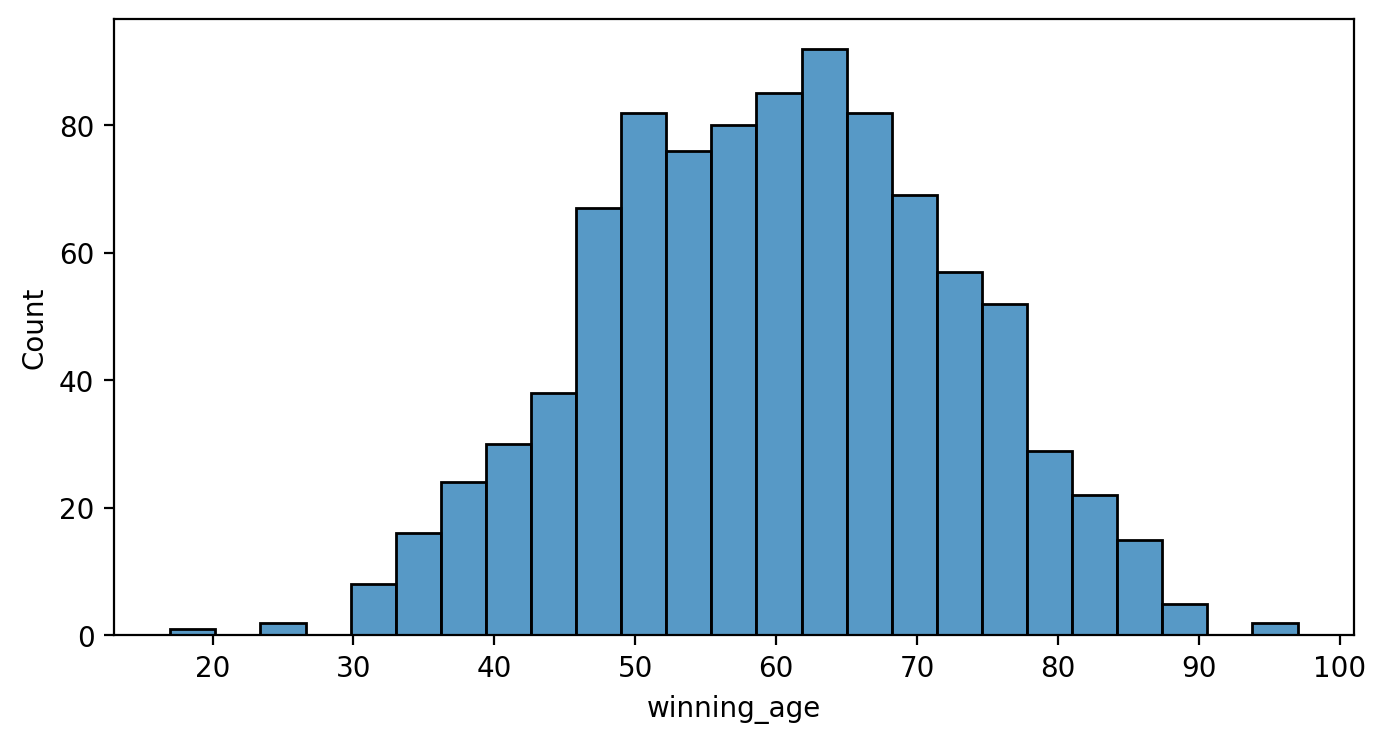

In [128]:
# Plotting out the winning_age in a histrogram to get a better idea...

plt.figure(figsize=(8, 4), dpi=200)

sns.histplot(data=df_data,
             x=df_data["winning_age"],
             bins=25)

plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


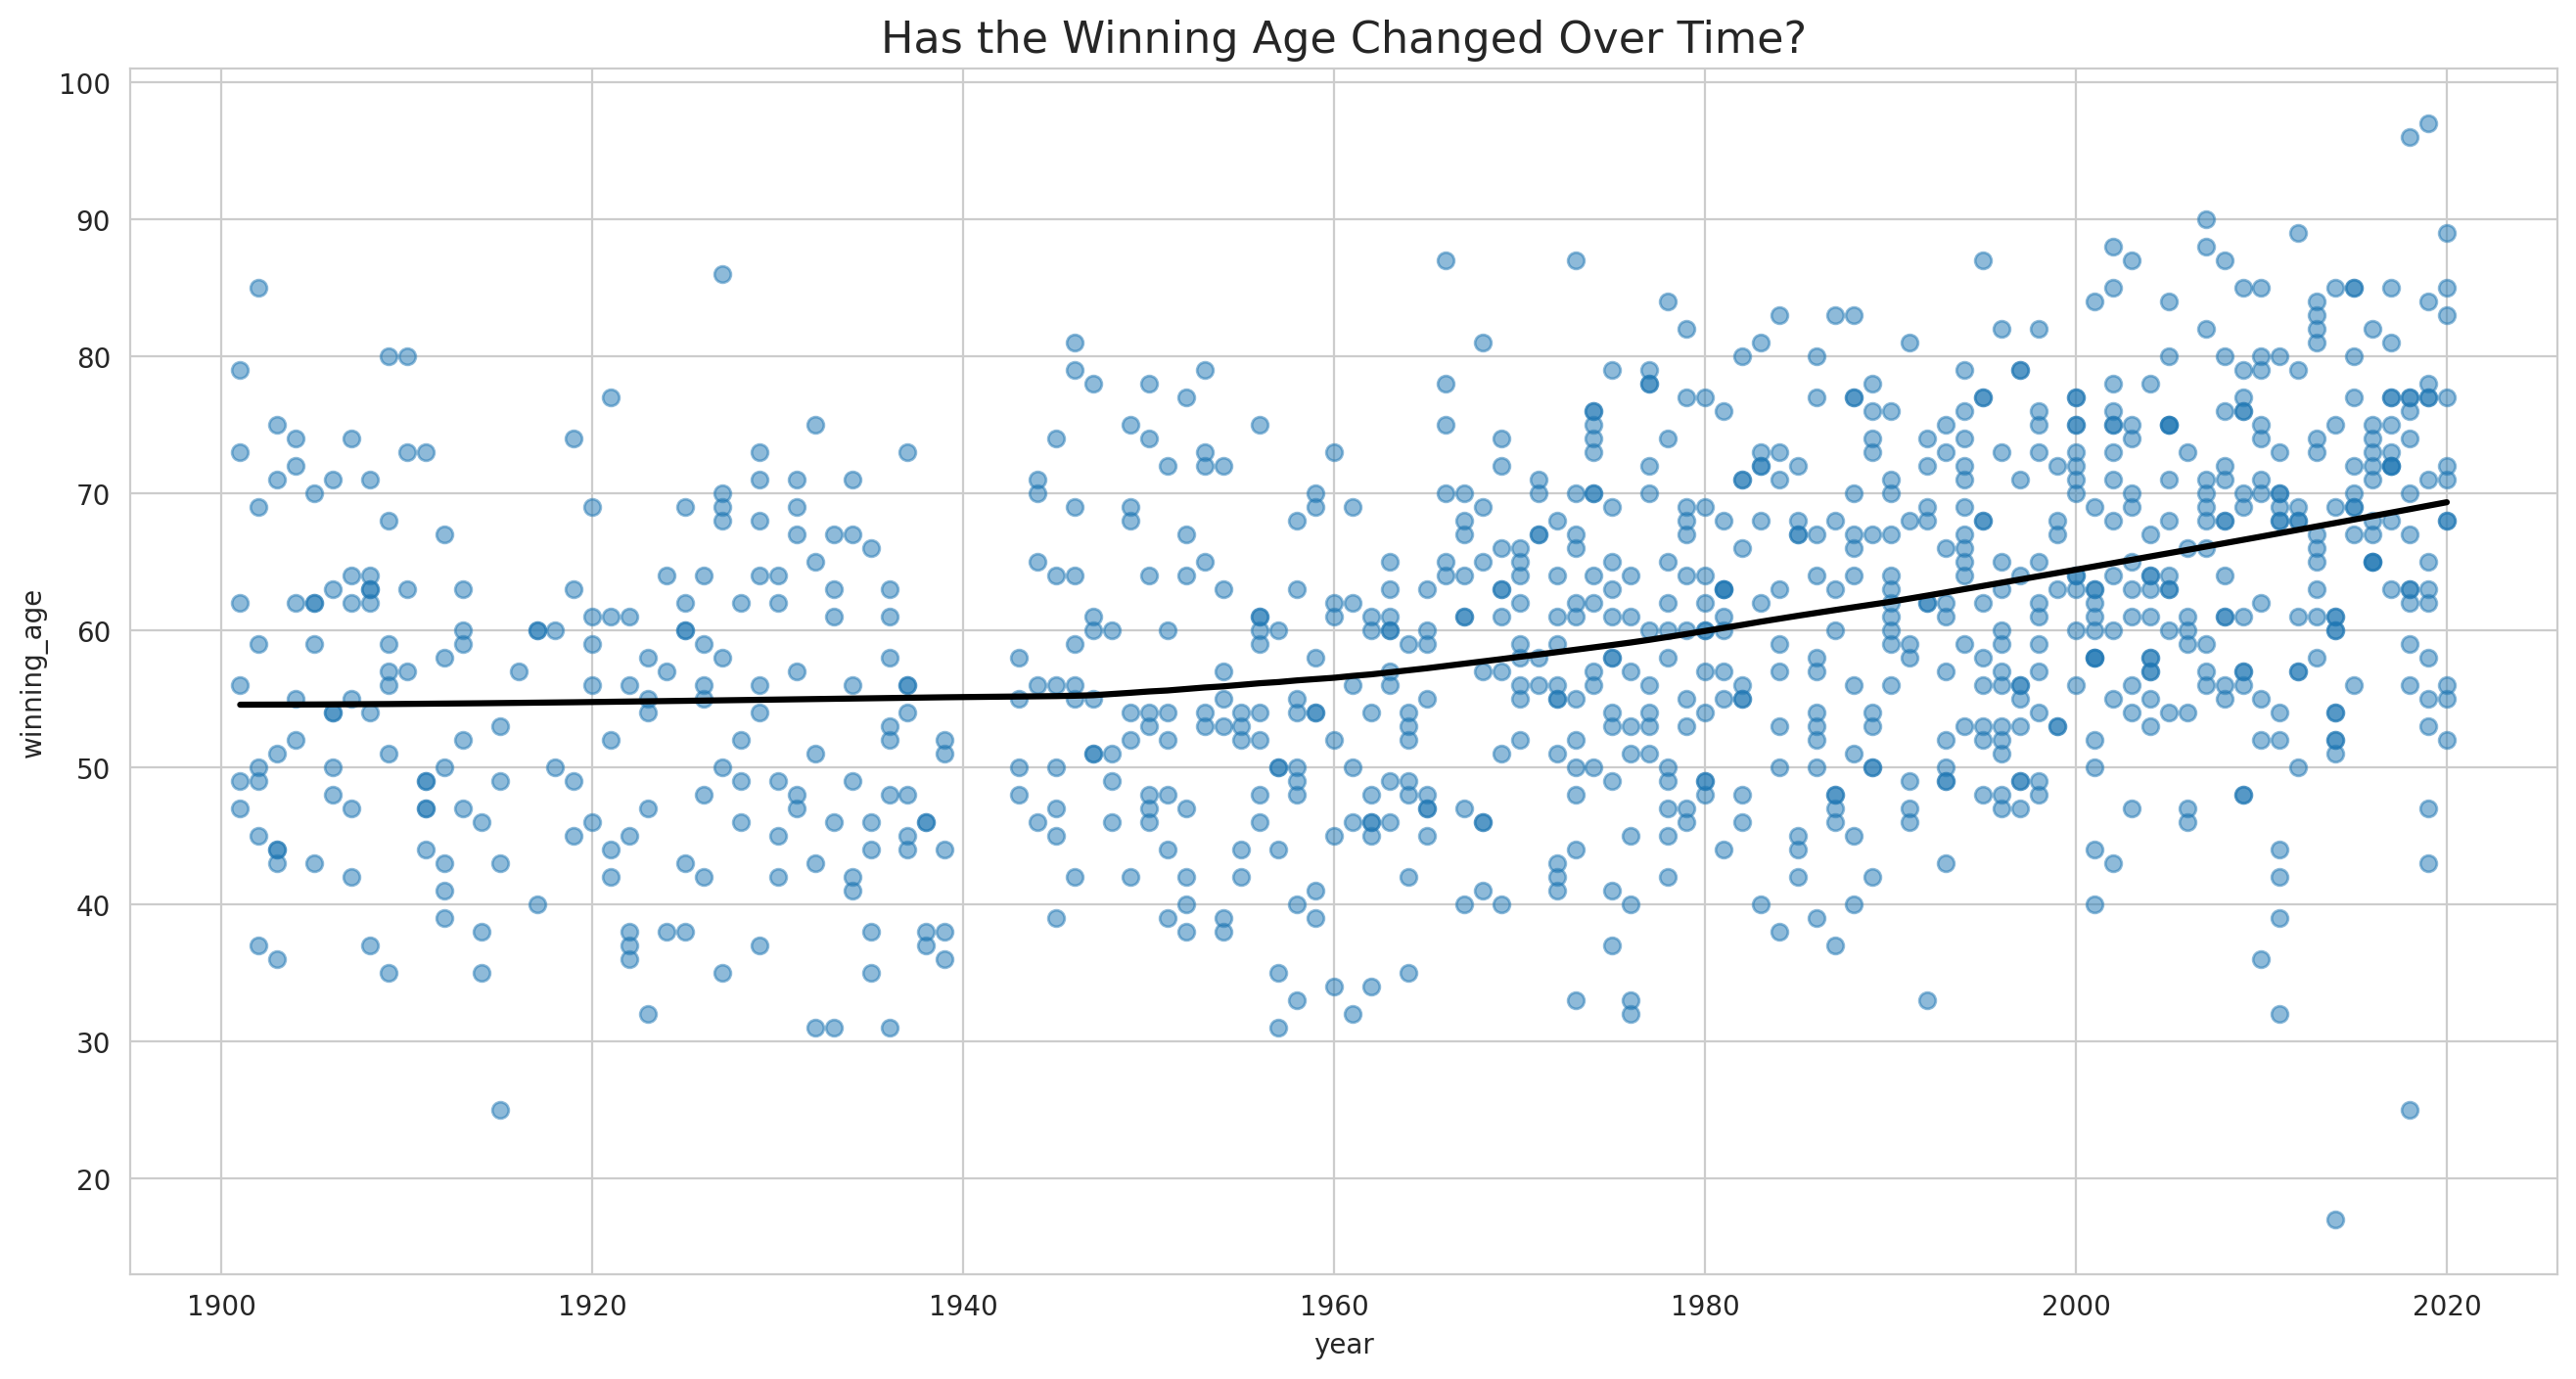

In [147]:
plt.figure(figsize=(16, 8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x="year",
                y="winning_age",
                lowess=True,
                scatter_kws={"alpha": 0.5},
                line_kws={"color": "black"})

    plt.title("Has the Winning Age Changed Over Time?", fontsize=16)
    plt.show()

- The average winning age has been on the steady increase since 60s.
- The spread past 2000 has been larger than ever before.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

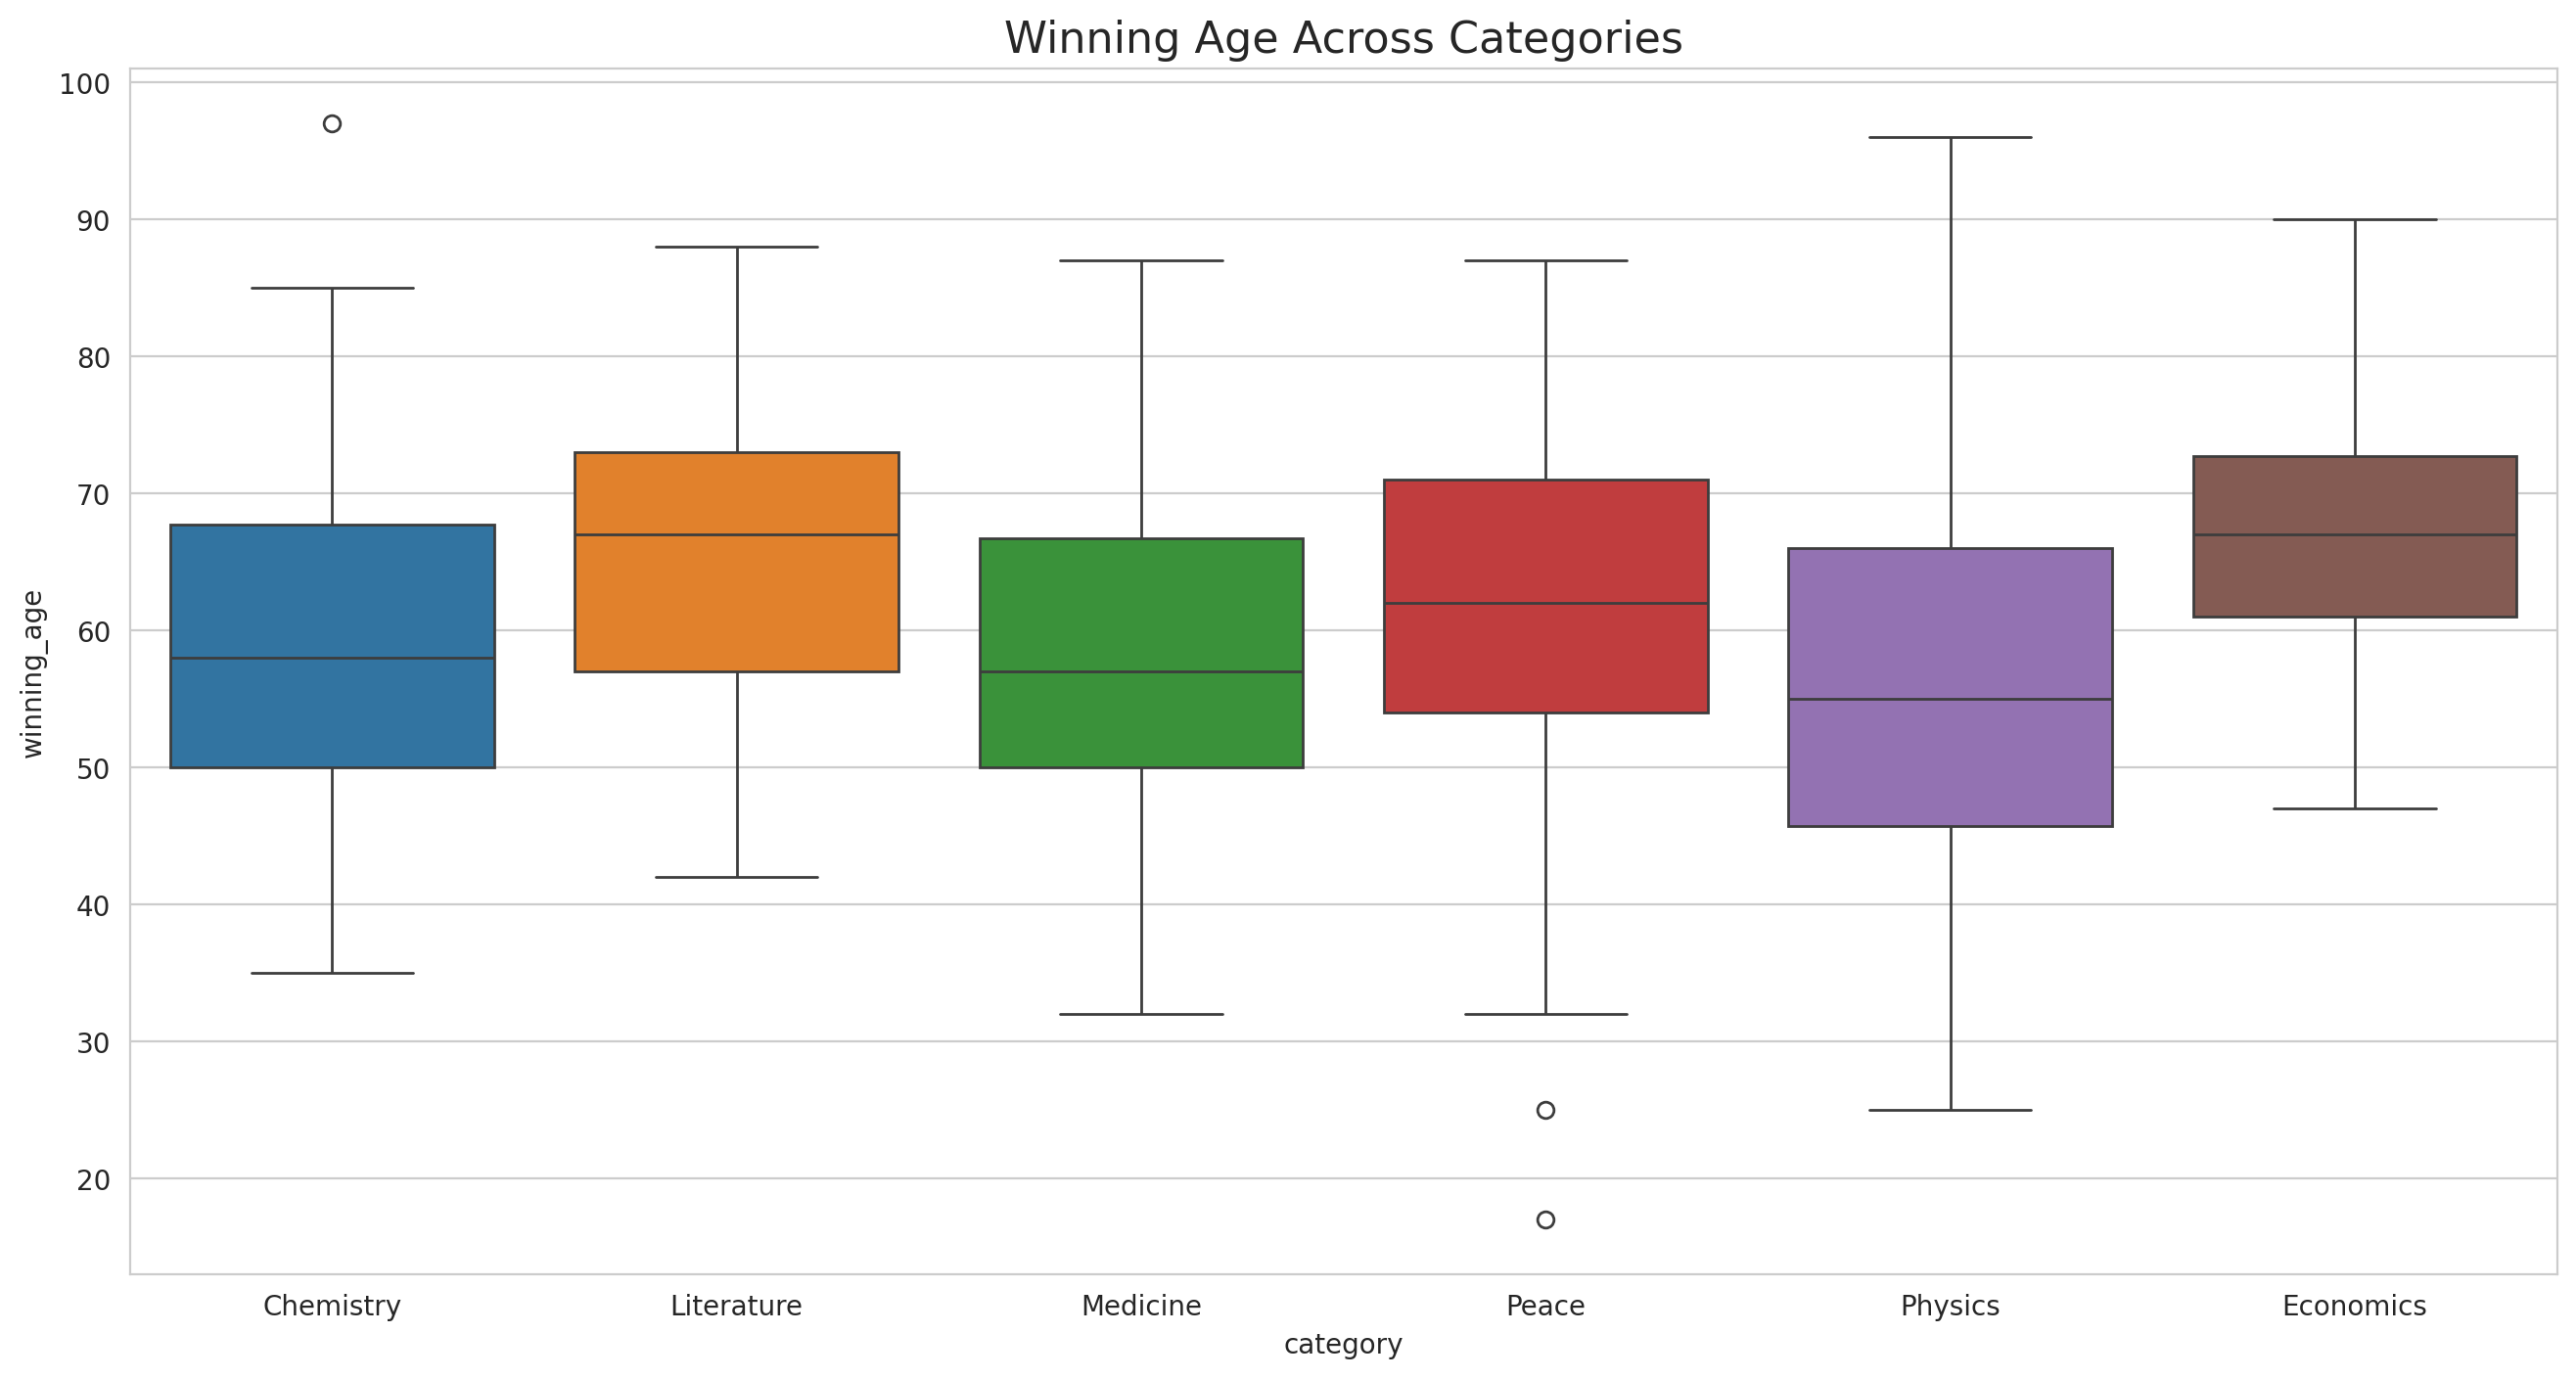

In [153]:
plt.figure(figsize=(16, 8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age',
                hue="category")

plt.title("Winning Age Across Categories", fontsize=16)
plt.show()

- Physics has the most varation but Peace has the youngest outliers in terms of winning age.
- Literature has the oldest average winning age (close with Economics) while Physics has the youngest winning age.

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


<Figure size 3200x1600 with 0 Axes>

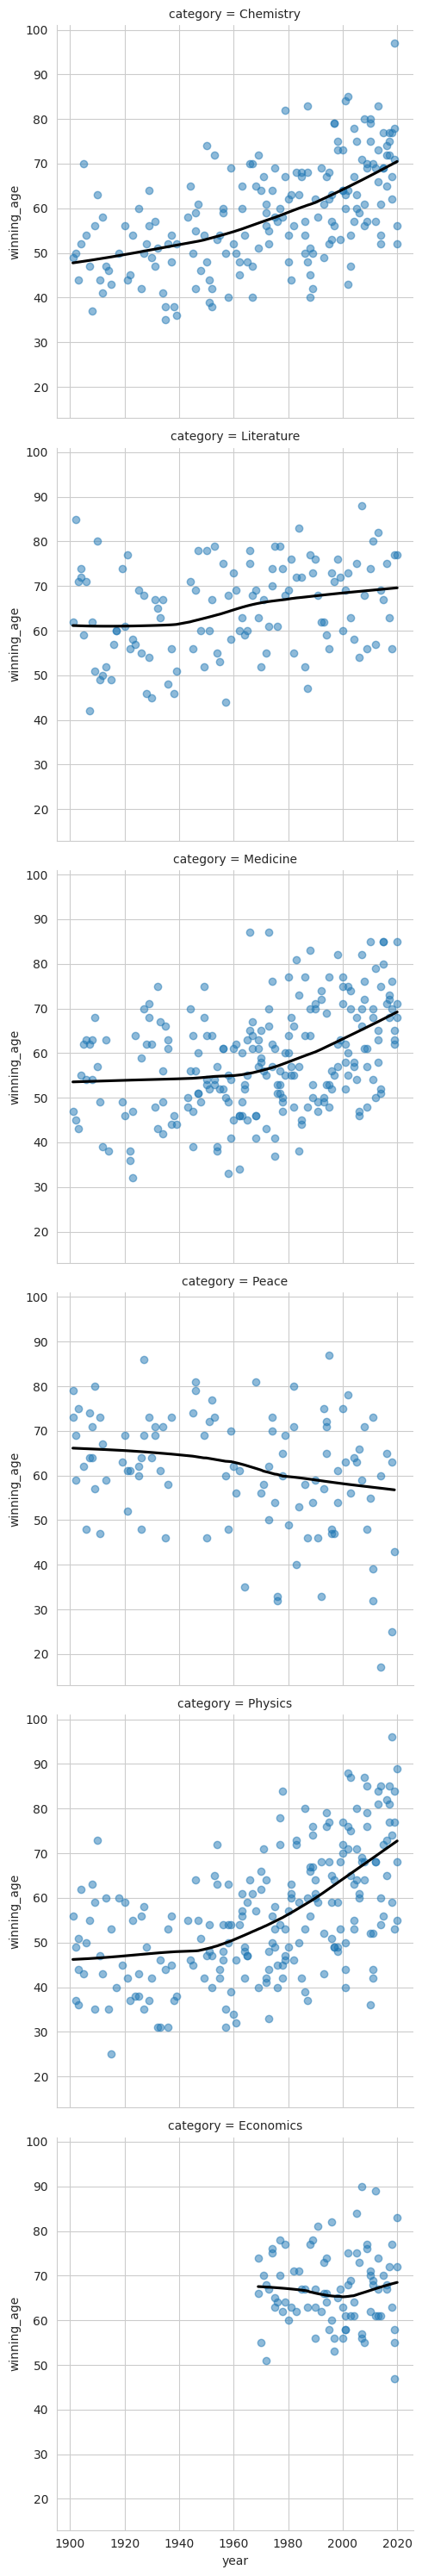

In [159]:
plt.figure(figsize=(16, 8), dpi=200)
with sns.axes_style("whitegrid"):
  sns.lmplot(df_data,
            x="year",
            y="winning_age",
            lowess=True,
            row="category",
            scatter_kws={"alpha": 0.5},
            line_kws={"color": "black"})

  plt.show()

- Chemistry, Medicene and Physics all have upward trends for winning age in recent years while Peace has a decreased trend and Literature has been increasing but at a decreasing rate.
- This tells a different story than when all the catergories were combined. (see chart below)

<Figure size 3200x1600 with 0 Axes>

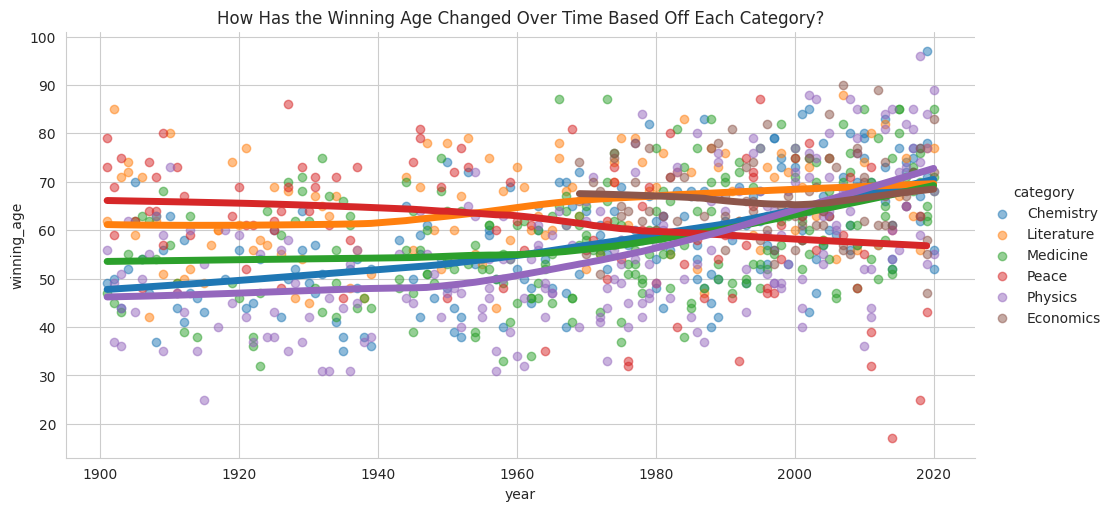

In [162]:
plt.figure(figsize=(16, 8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.title("How Has the Winning Age Changed Over Time Based Off Each Category?")
plt.show()